In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Optional
from matplotlib.figure import Figure
from dataclasses import dataclass

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch


In [3]:
base_df = hs.load_hard_sales()

In [4]:
pvmaker_df = hs.pivot_maker(base_df, begin_year=2015)
pvmaker_df

maker_name,Nintendo,SONY,Microsoft
year,,,
2015,2658729,2276704,17065
2016,2210608,2655885,8897
2017,5256106,2331454,14664
2018,4048808,1876955,15339
2019,4685076,1233821,8315
2020,6019704,797797,35009
2021,5607667,1072239,97234
2022,4815210,1176877,269737
2023,4065642,2660760,141712


In [ ]:
def plot_maker_share_bar(begin:Optional[datetime] = None, 
                         end:Optional[datetime] = None,
                         ticklabelsize:Optional[int] = None
                        ) -> tuple[Figure, pd.DataFrame]:
    """指定した期間のメーカー別シェアを棒グラフで表示する
    
    Args:
        begin: 集計開始日(通常は年初めに設定する)
        end: 集計終了日(通常は年末に設定する)
        
    Returns:
        tuple[Figure, pd.DataFrame]: グラフのFigureオブジェクトとプロットに使用したデータのDataFrameのタプル
        
        DataFrameのカラム構成:
        - index: year (int64): report_dateの年
        - columns: hw (string): ゲームハードの識別子
        - values: yearly_units (int64): 年次販売台数
    """
    def data_aggregator(hard_sales_df: pd.DataFrame) -> pd.DataFrame:
        pvmaker_df = hs.pivot_maker(hard_sales_df, 
                                    begin_year=begin.year if begin else None,
                                    end_year=end.year if end else None)
        # pvmaker_dfはカラム名がメーカーのDFである｡これをシェア率に変換する
        pvshare_df = pvmaker_df.div(pvmaker_df.sum(axis=1), axis=0) * 100.0
        return pvshare_df
    
    def color_generator(maker_list: List[str]) -> List[str]:
        return hi.get_maker_colors(maker_list)
    
    def labeler() -> ph.AxisLabels:
        return ph.AxisLabels(
            title=f"メーカーシェア",
            xlabel="シェア (%)",
            ylabel="年",
            legend="メーカー"
        )

    tick_params_fn = None
    if ticklabelsize is not None:
        tick_params_fn = lambda: TickParams(labelsize=ticklabelsize)

    return ph._plot_bar(
        data_aggregator=data_aggregator,
        color_generator=color_generator,
        labeler=labeler,
        tick_params_fn=tick_params_fn,
        begin=begin,
        end=end,
        stacked=True,
        horizontal=True,
        show_values=True,
        value_color="#D0E5D8",
        bar_width=0.8
    )


maker_name,Nintendo,SONY,Microsoft
year,,,
2016,45.3%,54.5%,0.2%
2017,69.1%,30.7%,0.2%
2018,68.1%,31.6%,0.3%
2019,79.0%,20.8%,0.1%
2020,87.8%,11.6%,0.5%
2021,82.7%,15.8%,1.4%
2022,76.9%,18.8%,4.3%
2023,59.2%,38.7%,2.1%
2024,66.2%,31.3%,2.5%


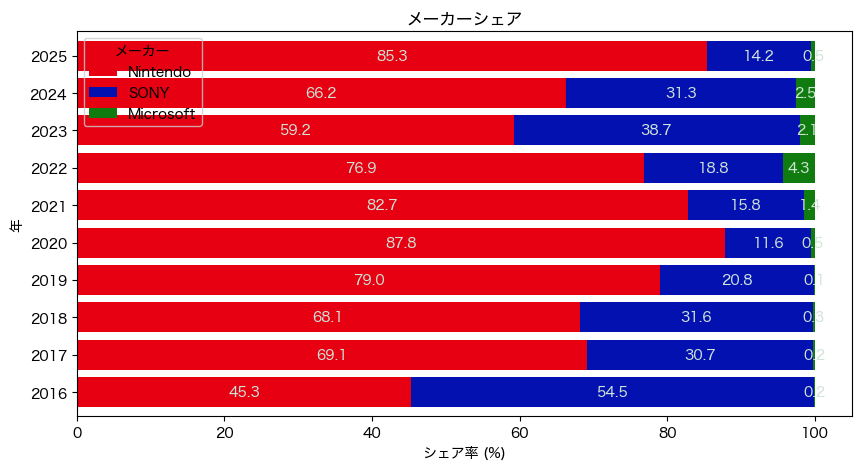

In [57]:
(fig, df) = plot_maker_share_bar(begin=datetime(2016, 1, 1))

share_style = df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
display(share_style)


maker_name,Nintendo,SONY,Microsoft
year,,,
2005,55.6%,43.4%,1.0%
2006,71.5%,27.1%,1.4%
2007,67.3%,31.2%,1.6%
2008,56.1%,41.3%,2.6%
2009,56.4%,40.5%,3.1%
2010,49.7%,48.1%,2.2%
2011,59.3%,39.5%,1.2%
2012,69.0%,30.3%,0.7%
2013,70.5%,29.2%,0.2%


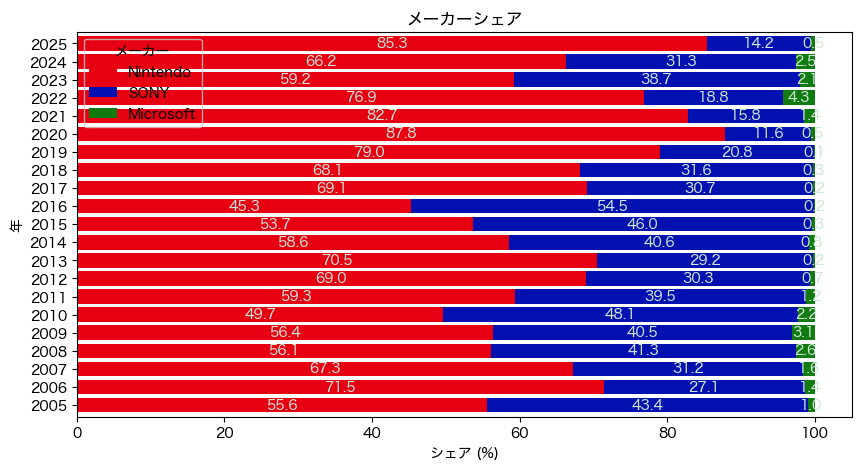

In [64]:
(fig, df) = ph.plot_maker_share_bar(begin=datetime(2005, 1, 1))

share_style = df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
share_style = share_style.background_gradient(cmap='Blues', axis=0)
display(share_style)
